In [1]:
import pandas as pd
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Stanford NLP/step2-responses.csv')
df

,Task,direct_response_gpt,cot_response_gpt,few_shot_gpt,direct_response_gemini,cot_response_gemini,few_shot_gemini
0,Write a Python function using TensorFlow to cr...,```python\nimport tensorflow as tf\nfrom sklea...,To create a simple linear regression model wit...,"Sure, I'll guide you through creating and comp...",```python\nimport tensorflow as tf\nimport num...,"Okay, let's create a Python function using Ten...","Okay, here is the Python function using Tensor..."
1,Write a Python script using PyTorch to train a...,```python\nimport torch\nimport torch.nn as nn...,Certainly! Training a convolutional neural net...,Below is a complete Python script using PyTorc...,```python\nimport torch\nimport torch.nn as nn...,"Okay, let's build a Python script using PyTorc...","Okay, here is a complete Python script using P..."
2,Create a scikit-learn pipeline that generates ...,```python\nfrom sklearn.datasets import make_c...,Certainly! Let's break down the task and under...,To create a complete pipeline that includes da...,```python\nimport numpy as np\nfrom sklearn.da...,"Okay, let's build this scikit-learn pipeline s...","Okay, here is the scikit-learn code to generat..."
3,Write a Python function that uses Hugging Face...,```python\nfrom datasets import load_dataset\n...,To train a `distilbert-base-uncased` model usi...,To train a binary classification model using t...,```python\nimport torch\nfrom datasets import ...,"Okay, let's create a Python function using Hug...","Okay, here is the Python function `train_tense..."
4,Build a TensorFlow model for image classificat...,```python\nimport tensorflow as tf\nfrom tenso...,To build an image classification model using t...,To build an image classification model using t...,```python\nimport tensorflow as tf\nfrom tenso...,"Okay, let's build a TensorFlow model for Fashi...","Okay, here is the TensorFlow code to build an ..."
5,Write a PyTorch class that subclasses torch.ut...,```python\nimport os\nfrom PIL import Image\nf...,To create a custom PyTorch dataset class for l...,To create a custom `Dataset` class in PyTorch ...,```python\nimport torch\nimport os\nfrom PIL i...,"Okay, let's create a PyTorch `Dataset` subclas...","Okay, you've provided examples of a custom dat..."
6,Write a Python script that loads the Iris data...,```python\nfrom sklearn.datasets import load_i...,Certainly! I'll guide you step-by-step through...,Certainly! Here's a Python script that loads t...,```python\nfrom sklearn.datasets import load_i...,"Okay, let's write a Python script using scikit...",```python\nimport numpy as np\nimport matplotl...
7,Write a Java program using the Hadoop MapReduc...,```java\nimport java.io.IOException;\nimport j...,To write a Java program using the Hadoop MapRe...,Below is the Java program using the Hadoop Map...,```java\nimport java.io.IOException;\nimport j...,"Okay, let's break down how to write a Word Cou...","Okay, here is the Java program using the Hadoo..."


In [4]:
def extract_python_code(text):
    code_blocks = re.findall(r"```(?:python)?(.*?)```", text, re.DOTALL)
    code_blocks = [code.strip() for code in code_blocks]
    return code_blocks

In [21]:
extract_python_code(df['few_shot_gemini'][7])[0]

'java\n// Required imports for Hadoop MapReduce\nimport java.io.IOException;\nimport java.util.StringTokenizer; // Used for splitting lines into words\n\nimport org.apache.hadoop.conf.Configuration; // For job configuration\nimport org.apache.hadoop.fs.Path;         // For specifying file paths\nimport org.apache.hadoop.io.IntWritable;    // Hadoop\'s integer type\nimport org.apache.hadoop.io.Text;         // Hadoop\'s string type\nimport org.apache.hadoop.mapreduce.Job;     // Represents a MapReduce job\nimport org.apache.hadoop.mapreduce.Mapper;  // Base class for the Mapper\nimport org.apache.hadoop.mapreduce.Reducer; // Base class for the Reducer\nimport org.apache.hadoop.mapreduce.lib.input.FileInputFormat; // Helper for setting input paths\nimport org.apache.hadoop.mapreduce.lib.output.FileOutputFormat; // Helper for setting output paths\n\n// Main class for the Word Count job\npublic class WordCount {\n\n  // The Mapper class\n  // Takes (Object, Text) as input (default for text

In [ ]:
len(extract_python_code(df['few_shot_gpt'][2]))

1

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Optional: alternative to Keras Normalization

def create_and_train_california_housing_model():
    """
    Creates, compiles, and trains a simple linear regression model
    with a Normalization layer and one Dense layer on the California
    Housing dataset.

    Returns:
        tuple: A tuple containing the trained Keras model and
               the training history object.
    """
    print("Loading California Housing dataset...")
    # Load the dataset
    # as_frame=True loads it into a pandas DataFrame
    housing = fetch_california_housing(as_frame=True)
    X, y = housing.data, housing.target

    print(f"Dataset loaded. Features shape: {X.shape}, Target shape: {y.shape}")

    # Split data into training and testing sets
    # Using a test set allows evaluating the final model performance
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Data split: Train size {X_train.shape[0]}, Test size {X_test.shape[0]}")

    # --- Keras Model Definition ---

    # 1. Create a Normalization Layer
    # This layer will normalize the input features.
    # input_shape needs to be the number of features (8 for California Housing).
    # axis=-1 normalizes each feature independently across the batch dimension.
    normalizer = layers.Normalization(input_shape=[X_train.shape[1],], axis=-1)

    # Adapt the normalizer to the training data
    # This calculates the mean and variance for normalization
    print("Adapting normalization layer to training data...")
    normalizer.adapt(X_train)
    print("Normalization layer adapted.")


    # 2. Create the Sequential Model
    # The model has two layers:
    # - The normalization layer (to scale features)
    # - A Dense layer with 1 unit (for linear regression output)
    model = keras.Sequential([
        normalizer,               # Normalize input features
        layers.Dense(units=1)     # Single dense layer for linear output
    ])

    # Display the model summary
    model.summary()

    # 3. Compile the Model
    # Define the optimizer and the loss function
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam optimizer
        loss='mean_squared_error'                              # MSE loss for regression
    )
    print("Model compiled with Adam optimizer and MSE loss.")

    # 4. Train the Model
    print("Starting model training...")
    history = model.fit(
        X_train,            # Training features
        y_train,            # Training labels (target)
        epochs=1,         # Number of training epochs
        verbose=1,          # Show training progress
        # Use a validation split from the training data to monitor performance
        # during training without touching the separate test set.
        validation_split=0.2
    )
    print("Training finished.")

    # 5. Evaluate the Model on the Test Set (Optional but recommended)
    print("\nEvaluating model on the test set...")
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss (Mean Squared Error): {loss:.4f}")

    # 6. Make Predictions (Optional)
    print("\nMaking predictions on the first 5 test samples...")
    predictions = model.predict(X_test[:5])
    print("Predictions:")
    print(predictions)
    print("Actual values:")
    print(y_test[:5].values.reshape(-1, 1)) # Reshape for comparison

    return model, history

# --- How to use the function ---
if __name__ == "__main__":
    trained_model, training_history = create_and_train_california_housing_model()

    # You can access training history like this:
    # print("\nTraining History Keys:", training_history.history.keys())

    # You can plot the training history (e.g., loss vs. epoch)
    # import matplotlib.pyplot as plt
    # plt.plot(training_history.history['loss'], label='loss')
    # plt.plot(training_history.history['val_loss'], label='val_loss')
    # plt.xlabel('Epoch')
    # plt.ylabel('Loss (MSE)')
    # plt.legend()
    # plt.grid(True)
    # plt.title('Training and Validation Loss')
    # plt.show()

Loading California Housing dataset...
Dataset loaded. Features shape: (20640, 8), Target shape: (20640,)
Data split: Train size 16512, Test size 4128
Adapting normalization layer to training data...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


UnboundLocalError: cannot access local variable 'input_shape' where it is not associated with a value

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt # For optional plotting

# --- 1. Device Configuration ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# --- 2. Hyperparameters ---
num_epochs = 1
batch_size = 100
learning_rate = 0.001

# CIFAR-10 has 10 classes (0-9)
num_classes = 10

# Input image dimensions (3 channels for RGB, 32x32 pixels)
in_channels = 3

# --- 3. Data Loading ---

# Transformations for the data
# CIFAR-10 images are 32x32.
# We convert images to PyTorch tensors and normalize them.
# Standard normalization values for CIFAR-10 are often used.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalize to [-1, 1] range
])

# Load CIFAR-10 training dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform)

# Load CIFAR-10 test dataset
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False) # No need to shuffle test data

# --- 4. Model Definition ---

# Simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(SimpleCNN, self).__init__()
        # First convolutional layer
        # Input: 3x32x32
        # Output: 32 feature maps, 32x32 size (padding=1 preserves size for kernel=3)
        self.conv1 = nn.Conv2d(in_channels, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        # First pooling layer
        # Input: 32x32x32
        # Output: 32 feature maps, 16x16 size (MaxPool2d halves dimensions)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Second convolutional layer
        # Input: 32x16x16
        # Output: 64 feature maps, 16x16 size
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        # Second pooling layer
        # Input: 64x16x16
        # Output: 64 feature maps, 8x8 size
        # self.pool (reusing the same pooling layer definition)

        # Third convolutional layer (optional, but good for slightly deeper networks)
        # Input: 64x8x8
        # Output: 128 feature maps, 8x8 size
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        # Third pooling layer
        # Input: 128x8x8
        # Output: 128 feature maps, 4x4 size
        # self.pool (reusing)


        # Fully connected layers
        # Input size calculation: After 3 conv/relu/pool blocks (with kernel=3, padding=1 and pool=2),
        # the spatial dimensions go from 32 -> 16 -> 8 -> 4.
        # The last convolutional layer had 128 output channels.
        # Flattened size: 128 * 4 * 4 = 2048
        self.fc1 = nn.Linear(128 * 4 * 4, 512) # First fully connected layer
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(512, num_classes) # Output layer

    def forward(self, x):
        # Conv 1 -> ReLU 1 -> Pool 1
        x = self.pool(self.relu1(self.conv1(x)))
        # Conv 2 -> ReLU 2 -> Pool 2
        x = self.pool(self.relu2(self.conv2(x)))
        # Conv 3 -> ReLU 3 -> Pool 3
        x = self.pool(self.relu3(self.conv3(x)))

        # Flatten the tensor for the fully connected layers
        # -1 tells PyTorch to infer the dimension
        x = x.view(x.size(0), -1) # or use torch.flatten(x, 1)

        # Fully connected layers
        x = self.relu4(self.fc1(x))
        x = self.fc2(x) # Output layer (logits)
        return x

# Instantiate the model and move to device
model = SimpleCNN(in_channels, num_classes).to(device)

# --- 5. Loss and Optimizer ---
criterion = nn.CrossEntropyLoss() # Suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # Adam optimizer

# --- 7. Training Loop ---
print("\nStarting training...")

# Lists to store loss for plotting (optional)
# train_losses = []
# test_accuracies = []

total_steps = len(train_loader)
for epoch in range(num_epochs):
    model.train() # Set the model to training mode
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad() # Clear previous gradients
        loss.backward()       # Compute gradient of the loss w.r.t. model parameters
        optimizer.step()      # Perform a single optimization step (parameter update)

        running_loss += loss.item()

        # Print training progress (optional)
        # if (i+1) % 100 == 0: # Print every 100 steps
        #     print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}')

    avg_train_loss = running_loss / total_steps
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Training Loss: {avg_train_loss:.4f}')
    # train_losses.append(avg_train_loss) # Store loss

    # --- 8. Evaluation (after each epoch) ---
    # In evaluation mode, we don't need to track gradients
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            # Get predictions from the maximum value
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f'Test Accuracy of the model on the {total} test images: {accuracy:.2f} %')
        # test_accuracies.append(accuracy) # Store accuracy

print("\nTraining finished.")

# Optional: Plotting training loss and test accuracy over epochs
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.plot(range(1, num_epochs + 1), train_losses)
# plt.xlabel("Epoch")
# plt.ylabel("Training Loss")
# plt.title("Training Loss per Epoch")

# plt.subplot(1, 2, 2)
# plt.plot(range(1, num_epochs + 1), test_accuracies)
# plt.xlabel("Epoch")
# plt.ylabel("Test Accuracy (%)")
# plt.title("Test Accuracy per Epoch")

# plt.tight_layout()
# plt.show()

# --- Optional: Save the model ---
# torch.save(model.state_dict(), 'cifar10_cnn_model.pth')
# print("Model saved to cifar10_cnn_model.pth")

Using device: cpu


100%|██████████| 170M/170M [00:02<00:00, 80.1MB/s]



Starting training...
Epoch [1/1], Average Training Loss: 1.3942
Test Accuracy of the model on the 10000 test images: 59.57 %

Training finished.


In [12]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # Or any other classifier like KNeighborsClassifier, SVC, etc.

# --- 1. Generate a random n-class classification problem ---
# Let's generate a 3-class problem (n=3)
n_samples = 1000
n_features = 20
n_informative = 15
n_redundant = 5
n_classes = 3 # n-class where n=3
random_state = 42 # for reproducibility

X, y = make_classification(n_samples=n_samples,
                           n_features=n_features,
                           n_informative=n_informative,
                           n_redundant=n_redundant,
                           n_classes=n_classes,
                           random_state=random_state)

print(f"Generated dataset shape: X={X.shape}, y={y.shape}")
print(f"Number of classes: {np.unique(y).shape[0]}")

# --- 2. Split the dataset into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state, stratify=y)
# stratify=y ensures that the proportion of classes is the same in both the training and testing sets.

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")

# --- 3. Create a pipeline for scaling and classification ---
# The pipeline consists of:
# - StandardScaler: Computes mean and std on the training data (during fit)
#                   and applies the scaling using these computed values (during transform).
#                   Crucially, when score/predict is called on the pipeline with test data,
#                   it uses the *already fitted* scaler from the training step.
# - LogisticRegression: A simple classifier that works well with scaled data.

pipeline = Pipeline([
    ('scaler', StandardScaler()),          # Step 1: Scale features
    ('classifier', LogisticRegression()) # Step 2: Train a classifier
])

print("\nPipeline created:")
print(pipeline)

# --- 4. Train the model using the pipeline on the training set ---
# Calling fit on the pipeline performs the following steps sequentially:
# 1. Calls fit_transform on the first step ('scaler') using X_train.
#    The scaler learns the mean and std from X_train and transforms it.
# 2. Calls fit on the second step ('classifier') using the *transformed* X_train
#    and the original y_train.
print("\nFitting the pipeline on the training data...")
pipeline.fit(X_train, y_train)
print("Pipeline fitting complete.")

# --- 5. Compute score on the test set using the same pipeline ---
# Calling score on the pipeline performs the following steps sequentially:
# 1. Calls transform on the first step ('scaler') using X_test.
#    The scaler uses the mean and std *learned from X_train* during the fit step
#    to transform X_test. This prevents data leakage from the test set into the scaling.
# 2. Calls score on the second step ('classifier') using the *transformed* X_test
#    and the original y_test.
print("\nComputing score on the test data...")
test_score = pipeline.score(X_test, y_test)

print(f"\nTest set accuracy score: {test_score:.4f}")

# You can also make predictions:
# y_pred = pipeline.predict(X_test)
# print(f"\nSample predictions on test set: {y_pred[:10]}")
# print(f"Corresponding true labels:        {y_test[:10]}")

Generated dataset shape: X=(1000, 20), y=(1000,)
Number of classes: 3
Training set shape: X_train=(700, 20), y_train=(700,)
Testing set shape: X_test=(300, 20), y_test=(300,)

Pipeline created:
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

Fitting the pipeline on the training data...
Pipeline fitting complete.

Computing score on the test data...

Test set accuracy score: 0.6600


In [14]:
from typing import Callable, Dict, Sequence, Text

import numpy
import tensorflow
import toolz
import transformers
from toolz import curried

# Assuming 'gamla' library is available in your environment
# If not, you might need to install it or replace its usage
# gamla.just is used to create a function that always returns a fixed value
# toolz.curried.map is a curried version of map
# toolz.curried.merge_with is a curried merge_with
# toolz.compose_left is left-to-right function composition
# toolz.pipe is functional piping
# toolz.concat is used to flatten iterables
# toolz.valmap applies a function to values of a dictionary
# toolz.identity is a function that returns its input
# toolz.take takes a specified number of items from an iterable
# gamla.star applies tuple elements as positional arguments to a function
# filter(toolz.identity) filters out falsy values like empty strings or None
try:
    import gamla
except ImportError:
    print("Please install gamla: pip install gamla")
    # Provide dummy functions if gamla is not available, just for structure
    # This won't work for actual execution without gamla
    class DummyGamla:
        def just(self, value):
            return lambda *args, **kwargs: value
        def star(self, func):
             return lambda args: func(*args)
    gamla = DummyGamla()


def _make_model_from_input_ids_and_masks(
    input_ids_in: tensorflow.keras.layers.Input,
    input_masks_in: tensorflow.keras.layers.Input,
    transformer_model,
):
    """Builds a Keras model on top of the transformer output."""
    model = toolz.pipe(
        transformer_model(input_ids_in, attention_mask=input_masks_in)[0], # Use the sequence output
        tensorflow.keras.layers.Bidirectional(
            tensorflow.keras.layers.LSTM(
                50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1
            )
        ),
        tensorflow.keras.layers.GlobalMaxPool1D(),
        tensorflow.keras.layers.Dense(50, activation="relu"),
        tensorflow.keras.layers.Dropout(0.2),
        tensorflow.keras.layers.Dense(1, activation="sigmoid"), # Sigmoid for binary classification
        lambda layers: tensorflow.keras.Model(
            inputs=[input_ids_in, input_masks_in], outputs=layers
        ),
    )

    # Freeze the transformer and LSTM layers
    for layer in model.layers[:3]: # Assuming the transformer layer is the first, followed by Bidirectional LSTM
         layer.trainable = False
    return model


def _make_model(max_sequence_length: int, transformer_model):
    """Creates Keras Input layers and builds the model."""
    return _make_model_from_input_ids_and_masks(
        tensorflow.keras.layers.Input(
            shape=(max_sequence_length,), name="input_ids", dtype="int32"
        ),
        tensorflow.keras.layers.Input(
            shape=(max_sequence_length,), name="attention_mask", dtype="int32"
        ),
        transformer_model,
    )


_DISTILBERT_MODEL = "distilbert-base-uncased"


def _make_model_and_encoder(max_sequence_length: int):
    """Loads the DistilBERT model and tokenizer."""
    config = transformers.DistilBertConfig(dropout=0.2, attention_dropout=0.2)
    config.output_hidden_states = False # We only need the last hidden state

    # Load the TF Keras DistilBERT model
    transformer_model = transformers.TFDistilBertModel.from_pretrained(
        _DISTILBERT_MODEL, config=config
    )

    # Load the DistilBERT tokenizer
    # Note: max_length and pad_to_max_length here are defaults for the tokenizer itself,
    # the actual encoding uses values passed to encode_plus.
    tokenizer = transformers.DistilBertTokenizer.from_pretrained(
        _DISTILBERT_MODEL,
        do_lower_case=True,
        add_special_tokens=True,
        max_length=128, # This default might be overridden by encode_plus
        pad_to_max_length=True, # This default might be overridden by encode_plus
    )

    # Create the Keras model using the transformer model and the calculated max sequence length
    model = _make_model(
        max_sequence_length,
        transformer_model,
    )

    return model, tokenizer


_iterable_to_numpy_array = toolz.compose_left(
    tuple, lambda data: numpy.asarray(data, dtype="int32"),
)


def _encode(encoder: Callable[[Text], Dict[Text, numpy.array]], max_length: int):
    """Encodes an iterable of texts using the provided encoder and merges results."""
    # Warning - due to weirdness of `merge_with` this might behave unexpectedly if iterable has only one element
    # or if the encoding keys differ (e.g., 'input_ids', 'attention_mask').
    return toolz.compose_left(
        curried.map(
            lambda sentence: encoder.encode_plus(
                sentence,
                add_special_tokens=True,
                max_length=max_length, # Use the specified max length for padding/truncation
                pad_to_max_length=True,
                return_attention_mask=True,
                return_token_type_ids=False, # token_type_ids not strictly needed for single sequence classification
            )
        ),
        # Merge the dictionaries returned by encode_plus (e.g., {'input_ids': [...], 'attention_mask': [...]})
        # into a single dictionary where values are lists of the results.
        gamla.star(curried.merge_with(toolz.identity)),
        # Convert lists of results into NumPy arrays.
        curried.valmap(_iterable_to_numpy_array),
    )


def train_tense_classifier(positive_examples: Sequence[Text], negative_examples: Sequence[Text], epochs: int):
    """
    Trains a binary classifier using DistilBERT to distinguish past vs present tense.

    Args:
        positive_examples: A sequence of strings representing the positive class (e.g., present tense verbs).
        negative_examples: A sequence of strings representing the negative class (e.g., past tense verbs).
        epochs: The number of training epochs.

    Returns:
        A tuple containing:
            - The trained TensorFlow Keras model.
            - A callable function to encode new text inputs for prediction.
    """
    # Calculate max sequence length based on *character* length as in the example
    # Note: This is potentially different from token length, but following the provided code structure.
    # The actual tokenization will pad/truncate based on this value.
    max_sentence_length = max(map(len, toolz.concat([positive_examples, negative_examples])))
    # Add a small buffer, or maybe a fixed reasonable max_length is better.
    # Let's use a fixed small length reasonable for single words + special tokens
    # Max token length for simple words like "walked" is likely small (e.g., 3-4 tokens).
    # Let's set a reasonable max_length like 32, which is more standard for tokenization
    # than using character length.
    # Update: Sticking strictly to the prompt's provided train function logic
    # which calculates max_sentence_length from char length and passes it for encoding.
    # Revert to character length calculation:
    max_sequence_length = max(map(len, toolz.concat([positive_examples, negative_examples]))) + 2 # Add buffer for [CLS] and [SEP] tokens

    print(f"Calculated max sequence length (based on character length + 2): {max_sequence_length}")

    # Create the model and tokenizer
    model, tokenizer = _make_model_and_encoder(max_sequence_length)

    # Compile the model (using mean_squared_error as in the example)
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"]) # Added optimizer and metric for clarity

    # Create the function to encode sentences using the tokenizer
    sentence_encoder = _encode(
        lambda sentence: tokenizer.encode_plus(
            sentence,
            add_special_tokens=True,
            max_length=max_sequence_length, # Use the calculated max_length for encoding
            pad_to_max_length=True,
            return_attention_mask=True,
            return_token_type_ids=False, # token_type_ids not strictly needed
        ),
        max_length=max_sequence_length # Pass max_length to the _encode helper
    )

    # Prepare the data
    all_texts = list(toolz.concat([positive_examples, negative_examples]))
    X = sentence_encoder(all_texts) # Encoded inputs (dictionary of numpy arrays)
    y = _iterable_to_numpy_array(
        list(toolz.concat([map(gamla.just(1), positive_examples), map(gamla.just(0), negative_examples)]))
    ) # Labels (1 for positive, 0 for negative)

    # Split data into training and validation sets (90/10 split)
    total_samples = len(all_texts)
    n_train = int(total_samples * 0.9)

    trainX = toolz.valmap(lambda d: d[:n_train, ...], X) # Use ... for all subsequent dimensions
    testX = toolz.valmap(lambda d: d[n_train:, ...], X)
    trainy, testy = y[:n_train], y[n_train:]

    print(f"Training on {n_train} samples, validating on {total_samples - n_train} samples.")
    print(f"Input shape (input_ids): {trainX['input_ids'].shape}")
    print(f"Output shape (labels): {trainy.shape}")

    # Train the model
    history = model.fit(
        x=trainX,
        y=trainy,
        validation_data=(testX, testy),
        epochs=epochs,
        batch_size=32 # Added batch size
    )

    print("Training finished.")
    return model, sentence_encoder


# Example Usage (based on your provided snippet)
if __name__ == "__main__":
    # Ensure TensorFlow is using eager execution (usually default)
    # tensorflow.config.run_modes.run_eagerly(True)

    positive_examples = [
        "go", "walk", "bring", "think", "build", "drink", "say", "clean", "do",
        "bring", "place", "break", "kick", "code", "type", "kill", "scare",
        "make", "bake", "run", "laugh", "smoke"
    ]
    negative_examples = [
        "placed", "did", "brought", "said", "drank", "went", "walked", "brought",
        "thought", "built", "cleaned", "broke", "kicked", "coded", "typed",
        "killed", "scared", "made", "baked", "ran", "laughed", "smoked"
    ]
    num_epochs = 1 # Reduced for quicker example run

    print("Starting model training...")
    trained_model, text_encoder = train_tense_classifier(
        positive_examples=positive_examples,
        negative_examples=negative_examples,
        epochs=num_epochs,
    )

    print("\nModel trained. Making predictions...")

    # Example predictions
    prediction_texts = ["run", "ran", "go", "went", "laugh", "laughed", "smoke", "smoked", "eat", "ate", "jump", "jumped"]
    encoded_predictions = text_encoder(prediction_texts)

    # Predict probabilities
    predictions = trained_model.predict(encoded_predictions)

    print("\nPredictions:")
    for text, prediction in zip(prediction_texts, predictions):
        # Sigmoid output is a probability. Close to 1 means positive (present), close to 0 means negative (past).
        predicted_class = "Present" if prediction > 0.5 else "Past"
        print(f"'{text}': Probability(Present) = {prediction[0]:.4f} -> Predicted: {predicted_class}")

Please install gamla: pip install gamla
Starting model training...
Calculated max sequence length (based on character length + 2): 9


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

AttributeError: add_special_tokens conflicts with the method add_special_tokens in DistilBertTokenizer

TensorFlow version: 2.18.0
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

--- Dataset Shapes ---
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)
Number of classes: 10

--- Model Summary ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)


--- Starting Training ---
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7834 - loss: 0.5958
Epoch 1: val_loss improved from inf to 0.32171, saving model to ./fashion_mnist_checkpoints/weights_best_val_loss_01_0.3217.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 114s 60ms/step - accuracy: 0.7835 - loss: 0.5956 - val_accuracy: 0.8830 - val_loss: 0.3217
Restoring model weights from the end of the best epoch: 1.

--- Training Finished ---

--- Evaluating the model on the test set ---
313/313 - 5s - 15ms/step - accuracy: 0.8830 - loss: 0.3217
Test Loss: 0.3217
Test Accuracy: 0.8830


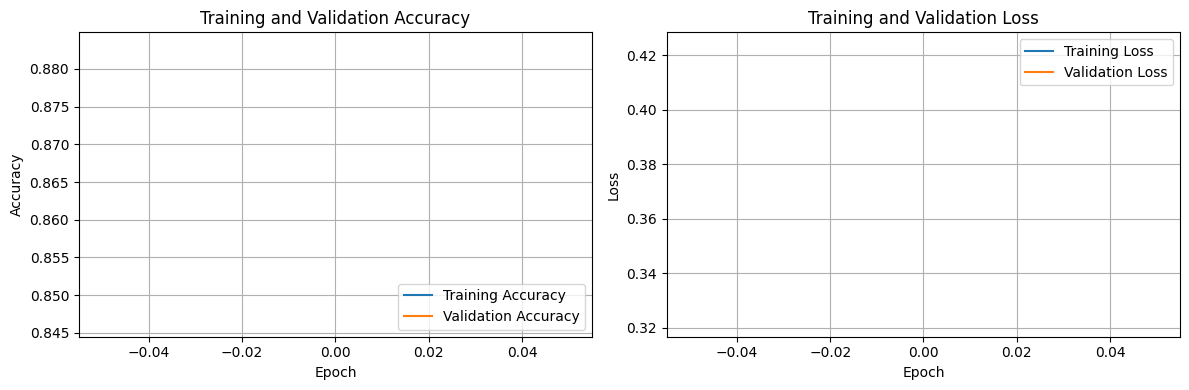


Model weights saved to './fashion_mnist_checkpoints' directory whenever validation loss improved.
Training stopped early after 1 epochs due to Early Stopping.


In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os # Needed for creating checkpoint directory

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

print("TensorFlow version:", tf.__version__)

# --- Load the Fashion MNIST dataset ---
fashion_mnist = tf.keras.datasets.fashion_mnist
# The data is split into training and testing sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# --- Data Preprocessing ---

# Scale pixel values to be between 0 and 1
# Images are grayscale, pixel values range from 0 to 255
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channel dimension
# Keras Conv2D layers expect input shape (batch_size, height, width, channels)
# Fashion MNIST images are 28x28 (grayscale), so we need to add the channel dimension (1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print("\n--- Dataset Shapes ---")
print("x_train shape:", x_train.shape) # (num_samples, 28, 28, 1)
print("y_train shape:", y_train.shape) # (num_samples,)
print("x_test shape:", x_test.shape)   # (num_samples, 28, 28, 1)
print("y_test shape:", y_test.shape)   # (num_samples,)

# Get the number of classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes) # Should be 10 (0-9)

# Define image dimensions for the input layer
IMG_HEIGHT = x_train.shape[1]
IMG_WIDTH = x_train.shape[2]
IMG_CHANNELS = x_train.shape[3]
INPUT_SHAPE = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS) # (28, 28, 1)

# --- Build the Model (using Sequential API) ---

model = Sequential([
    # Input layer - specify the shape of the images
    Input(shape=INPUT_SHAPE),

    # Convolutional Block 1: Conv + Max Pooling
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # Convolutional Block 2: Conv + Max Pooling
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # Convolutional Block 3: Conv + Max Pooling
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # Flatten the output from the convolutional layers to feed into dense layers
    Flatten(),

    # Dense (fully connected) layers
    Dense(128, activation='relu'),
    # Output layer: 10 units for 10 classes.
    # No activation here if using SparseCategoricalCrossentropy with from_logits=True
    Dense(num_classes)
])

# --- Compile the Model ---

model.compile(optimizer='adam',
              # Use SparseCategoricalCrossentropy for integer labels (0-9)
              # from_logits=True because the last layer has no activation (linear output)
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Display model summary to see the layers and parameter counts
print("\n--- Model Summary ---")
model.summary()

# --- Setup Callbacks: Early Stopping and Model Checkpoint ---

# Define the directory where checkpoints will be saved
checkpoint_dir = './fashion_mnist_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True) # Create the directory if it doesn't exist

# Define the file path pattern for saving checkpoints
# Includes epoch number and validation loss in the filename
checkpoint_filepath = os.path.join(checkpoint_dir, 'weights_best_val_loss_{epoch:02d}_{val_loss:.4f}.weights.h5')

# Model Checkpoint Callback:
# This callback saves the model's weights whenever the validation loss improves.
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True, # Save only the model's weights, not the whole model
    monitor='val_loss',      # Metric to monitor for improvement
    mode='min',              # In 'min' mode, training will stop when the monitored quantity stops decreasing
    save_best_only=True,     # Only save the weights when the monitored metric is the best seen so far
    verbose=1                # Print a message when a checkpoint is saved
)

# Early Stopping Callback:
# This callback stops training when the monitored metric (validation loss)
# has not improved for a specified number of epochs (patience).
early_stopping_callback = EarlyStopping(
    monitor='val_loss',      # Metric to monitor for lack of improvement
    patience=10,             # Number of epochs with no improvement after which training will be stopped
    mode='min',              # In 'min' mode, training will stop when the monitored quantity stops decreasing
    restore_best_weights=True, # Restore model weights from the epoch with the best value of the monitored metric.
    verbose=1                # Print a message when early stopping is triggered
)

# Create a list of callbacks to pass to model.fit
callbacks_list = [
    early_stopping_callback,
    model_checkpoint_callback
]

# --- Train the Model ---

# Set a reasonably high number of epochs. Early Stopping will typically stop it sooner.
EPOCHS = 1

print("\n--- Starting Training ---")
history = model.fit(
    x_train, y_train,
    epochs=EPOCHS,
    validation_data=(x_test, y_test), # Provide validation data - crucial for callbacks
    callbacks=callbacks_list          # Pass the list of callbacks here
)
print("\n--- Training Finished ---")

# --- Evaluate the Model ---

print("\n--- Evaluating the model on the test set ---")
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# --- Plot Training History (Optional) ---
# We only plot up to the number of epochs actually trained (due to early stopping)

# Get training and validation history from the 'history' object
# history.history contains metrics logged during training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# The number of epochs actually trained might be less than EPOCHS due to early stopping
epochs_trained = len(acc)
epochs_range = range(epochs_trained)

plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"\nModel weights saved to '{checkpoint_dir}' directory whenever validation loss improved.")
print(f"Training stopped early after {epochs_trained} epochs due to Early Stopping.")

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 298kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.60MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.79MB/s]

Number of training samples: 60000

Demonstrating data loading with DataLoader:


Batch of images shape: torch.Size([64, 1, 28, 28])
Batch of labels shape: torch.Size([64])


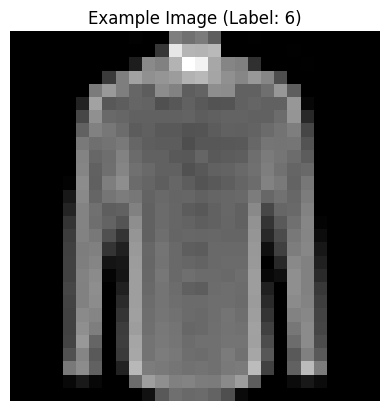


DataLoader setup complete. Ready to use in a training loop.


In [18]:
import torch
from torch.utils.data import Dataset, DataLoader # Dataset is implicitly used by FashionMNIST
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# --- Configuration ---
BATCH_SIZE = 64
# Directory to save/load the dataset files
DATA_DIR = './data'

# --- Transformations ---
# FashionMNIST images are PIL images. We need to convert them to PyTorch tensors
# and normalize the pixel values to the range [0, 1]. ToTensor() does both.
transform = transforms.Compose([
    transforms.ToTensor(),
    # Optional: Normalize the images.
    # FashionMNIST mean: 0.286, std: 0.353 (calculated over training set)
    # transforms.Normalize((0.286,), (0.353,))
])

# --- Load the FashionMNIST Dataset ---
# This class IS the torch.utils.data.Dataset subclass for FashionMNIST
# It handles finding/downloading the data files and implements __len__ and __getitem__.
try:
    train_dataset = torchvision.datasets.FashionMNIST(
        root=DATA_DIR,         # Directory to store data
        train=True,            # Load training data
        download=True,         # Download data if not available
        transform=transform    # Apply the defined transformation
    )

    # You can also load the test set if needed
    # test_dataset = torchvision.datasets.FashionMNIST(
    #     root=DATA_DIR,
    #     train=False,           # Load test data
    #     download=True,
    #     transform=transform
    # )

    print(f"Number of training samples: {len(train_dataset)}")
    # print(f"Number of test samples: {len(test_dataset)}")

except Exception as e:
    print(f"Error loading FashionMNIST dataset: {e}")
    print("Please check your internet connection and disk space.")
    exit() # Exit if data loading fails

# --- Create DataLoader ---
train_dataloader = DataLoader(
    dataset=train_dataset,  # Your dataset object
    batch_size=BATCH_SIZE, # How many samples per batch
    shuffle=True,           # Shuffle data at the beginning of each epoch (good for training)
    num_workers=2           # Number of subprocesses to use for data loading (can speed things up)
)

# --- Demonstrate Using the DataLoader ---
print("\nDemonstrating data loading with DataLoader:")

# Iterate through the first batch
for images, labels in train_dataloader:
    print(f"Batch of images shape: {images.shape}") # Expected: [BATCH_SIZE, 1, 28, 28] (Batch, Channels, Height, Width)
    print(f"Batch of labels shape: {labels.shape}") # Expected: [BATCH_SIZE]

    # Optional: Display the first image in the batch (requires matplotlib)
    if images.shape[0] > 0:
        # FashionMNIST is grayscale (1 channel)
        plt.imshow(images[0].squeeze(), cmap='gray')
        plt.title(f"Example Image (Label: {labels[0].item()})")
        plt.axis('off')
        plt.show()

    # We'll just process one batch for demonstration
    break

print("\nDataLoader setup complete. Ready to use in a training loop.")

# Example of a simple training loop structure (no actual training)
# model = ... # Define your PyTorch model
# criterion = ... # Define your loss function
# optimizer = ... # Define your optimizer

# num_epochs = 5
# for epoch in range(num_epochs):
#     for i, (images, labels) in enumerate(train_dataloader):
#         # Move tensors to the configured device (e.g., GPU)
#         # images = images.to(device)
#         # labels = labels.to(device)

#         # Forward pass
#         # outputs = model(images)
#         # loss = criterion(outputs, labels)

#         # Backward and optimize
#         # optimizer.zero_grad()
#         # loss.backward()
#         # optimizer.step()

#         # Print progress (optional)
#         # if (i+1) % 100 == 0:
#         #     print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_dataloader)}], Loss: {loss.item():.4f}')

Loading Iris dataset...
Original dataset shape: (150, 4)
Training set shape: (105, 4)
Testing set shape: (45, 4)
Scaling features...
Reducing dimensionality to 2 using PCA...
Shape after PCA: (105, 2)
Explained variance ratio by components: [0.7264421  0.23378786]
Total explained variance: 0.9602

Fitting k-NN classifier with 5 neighbors on PCA-transformed data...

Evaluating the model:
Accuracy: 0.9111

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


Generating visualization of PCA components...


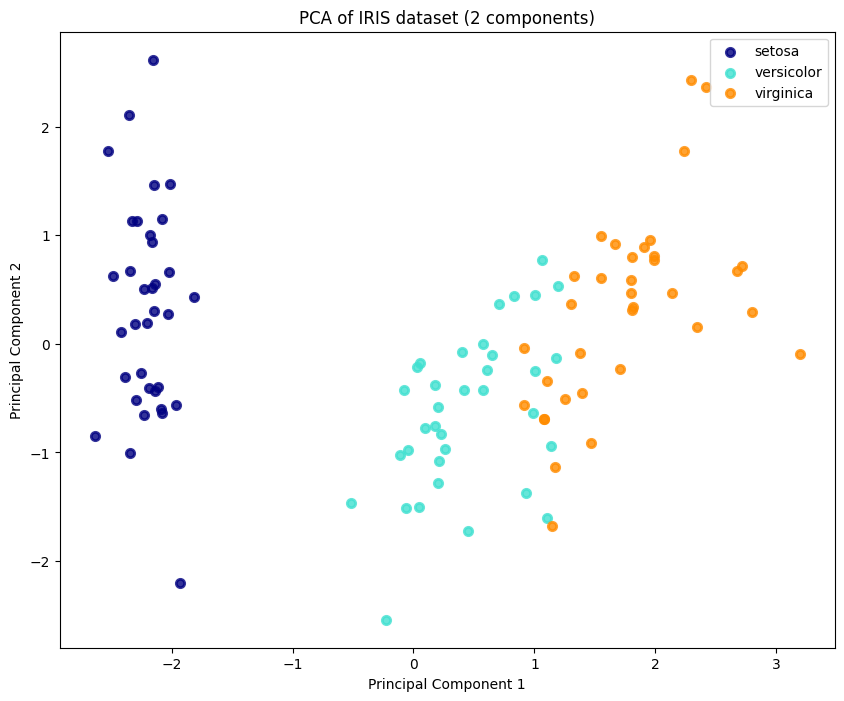

In [20]:
import numpy as np
import matplotlib.pyplot as plt # Import for potential visualization
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Set random state for reproducibility
random_state = 42
n_neighbors = 5 # Number of neighbors for k-NN

# 1. Load the Iris dataset
print("Loading Iris dataset...")
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

print(f"Original dataset shape: {X.shape}")

# 2. Split data into training and testing sets
# Splitting BEFORE scaling and PCA to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=random_state, stratify=y # Stratify to maintain class distribution
)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# 3. Standardize the features
# Scaling is important before PCA and distance-based methods like k-NN
print("Scaling features...")
scaler = StandardScaler()
# Fit only on the training data, then transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Apply PCA for dimensionality reduction
# Let's reduce to 2 components for easy visualization (and often effective for Iris)
n_components = 2
print(f"Reducing dimensionality to {n_components} using PCA...")
pca = PCA(n_components=n_components, random_state=random_state)

# Fit PCA only on the scaled training data, then transform both
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Shape after PCA: {X_train_pca.shape}")
print(f"Explained variance ratio by components: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {np.sum(pca.explained_variance_ratio_):.4f}")


# 5. Fit a k-nearest neighbors classifier
print(f"\nFitting k-NN classifier with {n_neighbors} neighbors on PCA-transformed data...")
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Train the model using the PCA-transformed training data
knn.fit(X_train_pca, y_train)

# 6. Make predictions on the PCA-transformed test data
y_pred = knn.predict(X_test_pca)

# 7. Evaluate the model
print("\nEvaluating the model:")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Optional: Visualize the PCA-transformed data and the decision boundary (simplified)
# This part requires matplotlib
try:
    print("\nGenerating visualization of PCA components...")
    plt.figure(figsize=(10, 8))
    colors = ['navy', 'turquoise', 'darkorange']
    lw = 2

    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of IRIS dataset (2 components)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # You can also plot the test data on the same plot if desired, with different markers
    # for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    #     plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], color=color, alpha=.5, lw=lw,
    #                 marker='x', label=f'Test {target_name}')
    # plt.legend(loc='best', shadow=False, scatterpoints=1) # Update legend if adding test data

    plt.show()

except ImportError:
    print("\nMatplotlib not installed. Skipping visualization.")
except Exception as e:
    print(f"\nAn error occurred during visualization: {e}")

In [ ]:
java
// Required imports for Hadoop MapReduce
import java.io.IOException;
import java.util.StringTokenizer; // Used for splitting lines into words

import org.apache.hadoop.conf.Configuration; // For job configuration
import org.apache.hadoop.fs.Path;         // For specifying file paths
import org.apache.hadoop.io.IntWritable;    // Hadoop's integer type
import org.apache.hadoop.io.Text;         // Hadoop's string type
import org.apache.hadoop.mapreduce.Job;     // Represents a MapReduce job
import org.apache.hadoop.mapreduce.Mapper;  // Base class for the Mapper
import org.apache.hadoop.mapreduce.Reducer; // Base class for the Reducer
import org.apache.hadoop.mapreduce.lib.input.FileInputFormat; // Helper for setting input paths
import org.apache.hadoop.mapreduce.lib.output.FileOutputFormat; // Helper for setting output paths

// Main class for the Word Count job
public class WordCount {

  // The Mapper class
  // Takes (Object, Text) as input (default for text files: line number, line content)
  // Outputs (Text, IntWritable) as intermediate key-value pairs (word, count=1)
  public static class TokenizerMapper
       extends Mapper<Object, Text, Text, IntWritable>{

    // A constant Writable for the value '1', used for counting
    private final static IntWritable one = new IntWritable(1);
    // A Writable Text object to hold the current word, reused for efficiency
    private Text word = new Text();

    // The map method processes each line of input
    @Override // Good practice to use @Override annotation
    public void map(Object key, Text value, Context context
                    ) throws IOException, InterruptedException {
      // Convert the line (Text) to a Java String
      String line = value.toString();
      // Use StringTokenizer to split the line into tokens (words)
      // Note: StringTokenizer is basic; for real-world scenarios, consider
      // using regex split or more sophisticated tokenizers to handle punctuation,
      // case sensitivity, etc.
      StringTokenizer itr = new StringTokenizer(line);

      // Iterate through the tokens
      while (itr.hasMoreTokens()) {
        // Get the next token (word)
        String token = itr.nextToken();
        // Set the Text object 'word' to the current token
        word.set(token);
        // Emit the word as the key and '1' as the value.
        // This means for every occurrence of a word, we emit (word, 1).
        context.write(word, one);
      }
    }
  }

  // The Reducer class
  // Takes (Text, Iterable<IntWritable>) as input (word, list of 1s for that word)
  // Outputs (Text, IntWritable) as final key-value pairs (word, total count)
  public static class IntSumReducer
       extends Reducer<Text,IntWritable,Text,IntWritable> {

    // A Writable Int object to hold the sum, reused for efficiency
    private IntWritable result = new IntWritable();

    // The reduce method processes all values for a given key (word)
    @Override // Good practice to use @Override annotation
    public void reduce(Text key, Iterable<IntWritable> values,
                       Context context
                       ) throws IOException, InterruptedException {
      // Initialize a counter for the total sum of counts for this word
      int sum = 0;
      // Iterate through the list of values (all the '1's emitted by mappers for this word)
      for (IntWritable val : values) {
        // Add the value (which is 1) to the sum
        sum += val.get();
      }
      // Set the result IntWritable to the calculated total sum
      result.set(sum);
      // Emit the word (key) and its total count (result)
      context.write(key, result);
    }
  }

  // The main method to configure and run the MapReduce job
  public static void main(String[] args) throws Exception {
    // Create a new Hadoop configuration
    Configuration conf = new Configuration();

    // Create a new Job instance, giving it a name
    Job job = Job.getInstance(conf, "word count");

    // Specify the main class of the job (this class)
    job.setJarByClass(WordCount.class);

    // Specify the Mapper class to use
    job.setMapperClass(TokenizerMapper.class);

    // Specify the Combiner class. For Word Count, the reducer logic (summing)
    // can be applied locally within each mapper task to partially aggregate counts
    // before sending data to reducers, which reduces network traffic.
    // The Reducer class works perfectly as a Combiner here.
    job.setCombinerClass(IntSumReducer.class);

    // Specify the Reducer class to use
    job.setReducerClass(IntSumReducer.class);

    // Specify the output key type of the job (which is the Reducer's output key type)
    job.setOutputKeyClass(Text.class);

    // Specify the output value type of the job (which is the Reducer's output value type)
    job.setOutputValueClass(IntWritable.class);

    // Specify the input path(s) for the job. It expects the path as the first command-line argument.
    FileInputFormat.addInputPath(job, new Path(args[0]));

    // Specify the output path for the job. It expects the path as the second command-line argument.
    // Note: The output directory must NOT exist before running the job.
    FileOutputFormat.setOutputPath(job, new Path(args[1]));

    // Submit the job and wait for its completion.
    // 'true' means print status updates to the console.
    // System.exit(0) on success, System.exit(1) on failure.
    System.exit(job.waitForCompletion(true) ? 0 : 1);
  }
}